In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle

from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
img_name = []
for i in range(90, 130, 10):
#     img_name = glob.glob('./sample_image/pracimg_name/resize/'+str(i)+'/*.png')
    tmp = glob.glob('../sample_image/pracimages/resize4/'+str(i)+'/*.png')
    img_name.append(tmp)

In [7]:
img_name = img_name[0] + img_name[1] + img_name[2] + img_name[3]

In [8]:
len(img_name)

560

In [9]:
img_name

['../sample_image/pracimages/resize4/90/p01img01_09569.png',
 '../sample_image/pracimages/resize4/90/p01img08_09710.png',
 '../sample_image/pracimages/resize4/90/p06img04_09613.png',
 '../sample_image/pracimages/resize4/90/p02img15_09494.png',
 '../sample_image/pracimages/resize4/90/p01img11_09277.png',
 '../sample_image/pracimages/resize4/90/p02img13_09322.png',
 '../sample_image/pracimages/resize4/90/p02img11_09389.png',
 '../sample_image/pracimages/resize4/90/p02img20_09079.png',
 '../sample_image/pracimages/resize4/90/p05img16_09259.png',
 '../sample_image/pracimages/resize4/90/p02img12_09222.png',
 '../sample_image/pracimages/resize4/90/p05img07_09732.png',
 '../sample_image/pracimages/resize4/90/p02img18_09122.png',
 '../sample_image/pracimages/resize4/90/p05img01_09724.png',
 '../sample_image/pracimages/resize4/90/p05img08_09549.png',
 '../sample_image/pracimages/resize4/90/p07img12_09068.png',
 '../sample_image/pracimages/resize4/90/p03img04_09880.png',
 '../sample_image/pracim

In [10]:
# img_name = np.array(img_name)

In [11]:
len(img_name[0]), len(img_name[-1])

(56, 57)

In [15]:
pid = []
weight = []
for i in range(len(img_name)):
    if img_name[i][37] == '/':
        pid.append(img_name[i][38:46])
        weight.append(img_name[i][47:52])
    else:
        pid.append(img_name[i][39:47])
        weight.append(img_name[i][48:53])

In [16]:
weight = np.array(weight).astype(int)
weight = weight/100

In [17]:
df = pd.DataFrame(data={'pid': pid, 'weight': weight})
df.sort_values('pid', inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

pid  weight
555  p28img16  121.22
556  p28img17  124.70
557  p28img18  120.82
558  p28img19  121.72
559  p28img20  124.12

In [18]:
# make pickle
f = open("./pickle/df.bin", "wb")
pickle.dump(df, f)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: './pickle/df.bin'

In [11]:
del pid, weight

In [19]:
df.weight.describe()

count    560.000000
mean     110.077071
std       11.610855
min       90.000000
25%      100.002500
50%      111.165000
75%      120.012500
max      129.890000
Name: weight, dtype: float64

In [13]:
# img = cv2.imread(img_name[0])[50:250, 0:500]
# img2 = cv2.imread(img_name[0], 0)[50:250, 0:500]

# print(img)
# plt.imshow(img)
# plt.show()
# print()

# print(img2)
# plt.imshow(img2)
# plt.show()
# print()
# img.shape, img2.shape

In [53]:
images = []
for img in img_name:
#     print(img)
    img = cv2.imread(img, 0)
#     print(img)
#     print(img.shape)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print(img)
#     print(img.shape)
#     plt.imshow(img, interpolation='bicubic', cmap='gray')
#     plt.show()
    images.append(img)
#     break

[[ 45  44  42 ... 172 173 172]
 [ 45  45  42 ... 172 173 172]
 [ 45  44  41 ... 172 173 172]
 ...
 [ 78  79  79 ... 124 127 128]
 [ 77  78  78 ... 123 126 128]
 [ 77  78  78 ... 122 125 127]]
(358, 636)


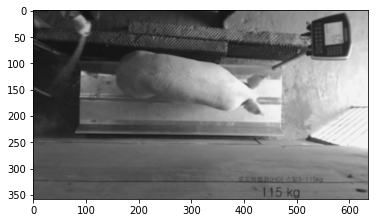

In [56]:
# images[0]
print(images[0])
print(images[0].shape)
plt.imshow(images[0], interpolation='bicubic', cmap='gray')
plt.show()

In [57]:
df['images'] = images

In [58]:
df.tail()

pid  weight                                             images
555  p28img16  121.22  [[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, ...
556  p28img17  124.70  [[107, 107, 107, 107, 107, 107, 107, 107, 107,...
557  p28img18  120.82  [[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, ...
558  p28img19  121.72  [[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, ...
559  p28img20  124.12  [[107, 107, 107, 107, 107, 107, 107, 107, 107,...

In [17]:
del img_name, images

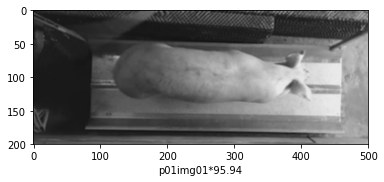

In [43]:
for i in range(len(df.images)):
    tmp = df.images[i][50:250, 0:500]
    plt.imshow(tmp, interpolation='bicubic')
    plt.xlabel(df.pid[i]+ '*' +str(df.weight[i]))
    plt.show()
#     break

In [20]:
# hand crop images
ls=['p08img05','p08img09','p08img19','p09img05','p09img08','p09img09','p09img14','p09img15',
 'p09img20','p10img07','p10img17','p10img19','p11img05','p11img08','p11img13','p11img17',
 'p11img18','p12img03','p12img04','p12img08','p12img10','p12img13','p13img02','p13img07',
 'p13img10','p13img12','p14img02','p14img10','p14img14','p14img18','p15img03','p15img04',
 'p15img10','p15img14','p16img01','p16img08','p16img09','p16img20','p17img01','p17img03',
 'p17img18','p18img10','p18img13','p18img18','p19img03','p19img08','p19img11','p20img01',
 'p20img02','p20img13','p21img01','p21img05','p21img08','p21img20','p22img01','p22img02',
 'p22img03','p22img04','p22img05','p22img07','p22img08','p22img09','p22img10','p22img11',
 'p22img14','p22img15','p22img16','p22img17','p22img18','p22img19','p23img02','p23img04',
 'p23img05','p23img06','p23img07','p23img08','p23img09','p23img11','p23img12','p23img13',
 'p23img15','p23img16','p23img17','p23img18','p23img20','p24img01','p24img02','p24img04',
 'p24img06','p24img07','p24img08','p24img10','p24img11','p24img12','p24img13','p24img14',
 'p24img15','p24img16','p24img17','p24img18','p24img19','p24img20','p25img01','p25img02',
 'p25img03','p25img06','p25img08','p25img09','p25img11','p25img13','p25img14','p25img16',
 'p25img18','p25img20','p26img01','p26img02','p26img03','p26img04','p26img05','p26img06',
 'p26img07','p26img09','p26img10','p26img11','p26img12','p26img13','p26img14','p26img16',
 'p26img18','p26img19','p26img20','p27img02','p27img03','p27img05','p27img06','p27img07',
 'p27img08','p27img09','p27img10','p27img11','p27img12','p27img13','p27img16','p27img17',
 'p27img18','p27img19','p28img03','p28img04','p28img05','p28img06','p28img07','p28img08',
 'p28img09','p28img10','p28img11','p28img12','p28img13','p28img14','p28img15','p28img17',
 'p28img18','p28img20']

In [21]:
hj = ['p08img05','p08img09','p08img19','p09img05','p09img08','p09img09','p09img14','p09img15',
 'p09img20','p10img07','p10img17','p10img19','p11img05','p11img08','p11img13','p11img17',
 'p11img18','p12img03','p12img04','p12img08','p12img10','p12img13','p13img02','p13img07',
 'p13img10','p13img12','p14img02','p14img10','p14img14','p14img18','p15img03','p15img04',
 'p15img10','p15img14','p16img01','p16img08','p16img09','p16img20','p17img01','p17img03',
 'p17img18','p18img10','p18img13','p18img18','p19img03','p19img08','p19img11','p20img01',
 'p20img02','p20img13','p21img01','p21img05','p21img08','p21img20','p22img01','p22img02',
 'p22img03','p22img04','p22img05','p22img07','p22img08','p22img09','p22img10','p22img11',
 'p22img14','p22img15','p22img16','p22img17','p22img18','p22img19','p23img02','p23img04',
 'p23img05','p23img06','p23img07','p23img08','p23img09','p23img11','p23img12','p23img13',]
 
yj = ['p23img15','p23img16','p23img17','p23img18','p23img20','p24img01','p24img02','p24img04',
 'p24img06','p24img07','p24img08','p24img10','p24img11','p24img12','p24img13','p24img14',
 'p24img15','p24img16','p24img17','p24img18','p24img19','p24img20','p25img01','p25img02',
 'p25img03','p25img06','p25img08','p25img09','p25img11','p25img13','p25img14','p25img16',
 'p25img18','p25img20','p26img01','p26img02','p26img03','p26img04','p26img05','p26img06',
 'p26img07','p26img09','p26img10','p26img11','p26img12','p26img13','p26img14','p26img16',
 'p26img18','p26img19','p26img20','p27img02','p27img03','p27img05','p27img06','p27img07',
 'p27img08','p27img09','p27img10','p27img11','p27img12','p27img13','p27img16','p27img17',
 'p27img18','p27img19','p28img03','p28img04','p28img05','p28img06','p28img07','p28img08',
 'p28img09','p28img10','p28img11','p28img12','p28img13','p28img14','p28img15','p28img17','p28img18','p28img20']

In [22]:
len(df), len(ls), len(df)-len(ls)

(560, 162, 398)

In [23]:
len(hj), len(yj)

(80, 82)

In [24]:
c_id=[]
c_img=[]

for i in range(len(df)):
    if df.pid[i] not in ls:
        c_id.append(df.pid[i])
        tmp = df.images[i][50:250, 0:500]
        c_img.append(tmp)

AttributeError: 'DataFrame' object has no attribute 'images'

In [25]:
len(c_id), len(c_img)

(1, 0)

In [26]:
c_df = pd.DataFrame(data={'pid':c_id, 'images':c_img})
c_df = c_df.set_index('pid')
c_df.tail()

ValueError: arrays must all be same length

In [45]:
c_df.images.iloc[0].shape

(200, 500, 3)

In [27]:
h_id_hj=[]
h_img_hj=[]

for i in range(len(df)):
    if df.pid[i] in hj:
        h_id_hj.append(df.pid[i])
        tmp = df.images[i][50:250, 0:500]
        plt.imshow(tmp, interpolation='bicubic')
#         plt.xlabel(df.pid[i]+ '*' +str(df.weight[i]))
        plt.xlabel(df.pid[i])
        plt.show()

AttributeError: 'DataFrame' object has no attribute 'images'

In [52]:
len(h_id_hj)

80

In [310]:
# print(df[df.pid == h_id[0]].index.values)
tmp = df.images[df[df.pid == h_id_hj[80]].index.values[0]]
tmp = tmp[80:280,50:550]
plt.imshow(tmp, interpolation='bicubic')
plt.show()
# h_img_hj.append(tmp)

IndexError: list index out of range

In [312]:
len(h_img_hj), len(h_id_hj[:81])

(80, 80)

In [314]:
# make pickle
f = open("./pickle/h_img_hj.bin", "wb")
pickle.dump(h_img_hj, f)
f.close()

# load pickle
f = open("./pickle/h_img_hj.bin", "rb")
h_img_hj = pickle.load(f)
f.close()

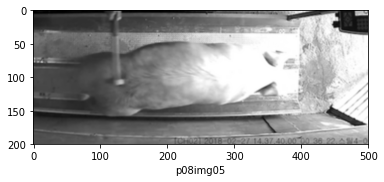

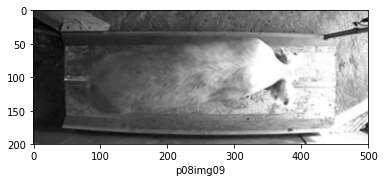

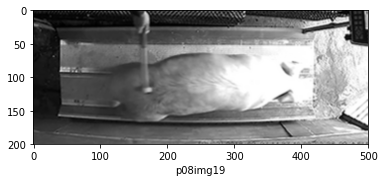

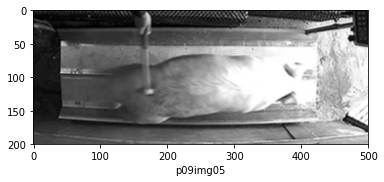

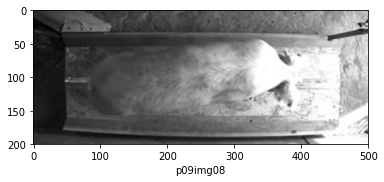

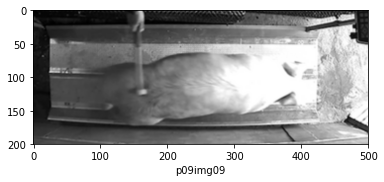

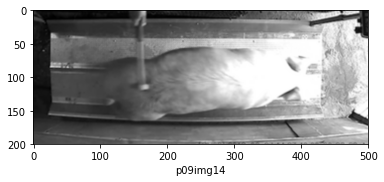

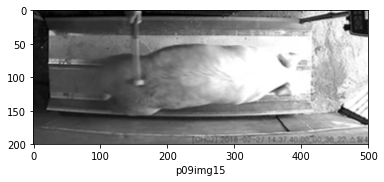

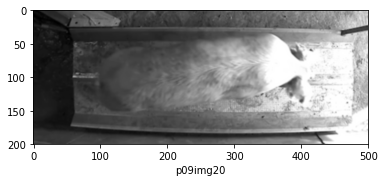

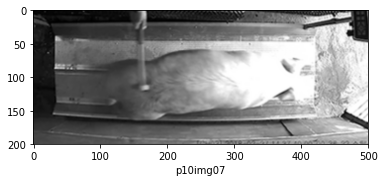

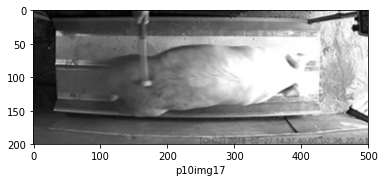

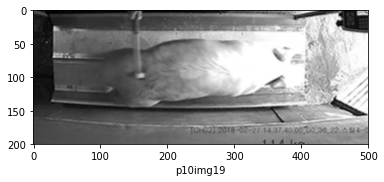

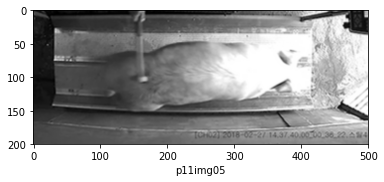

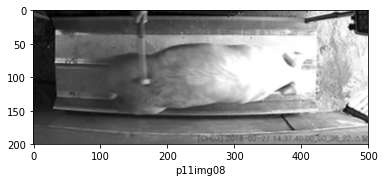

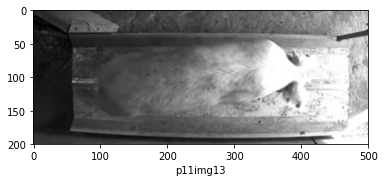

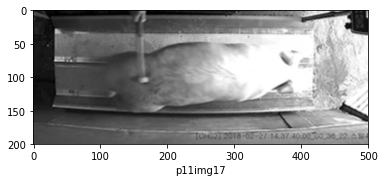

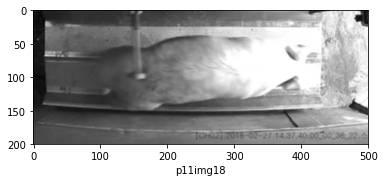

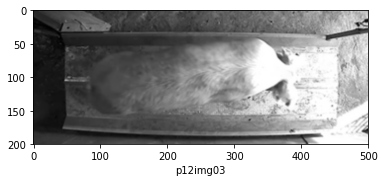

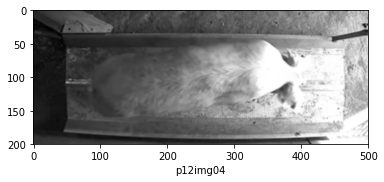

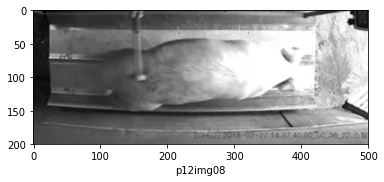

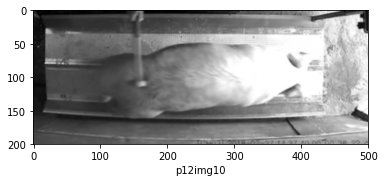

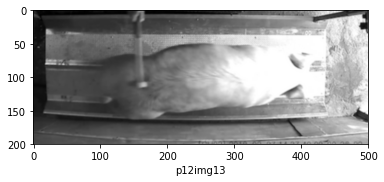

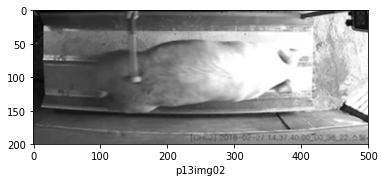

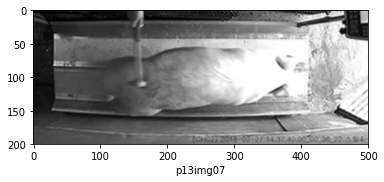

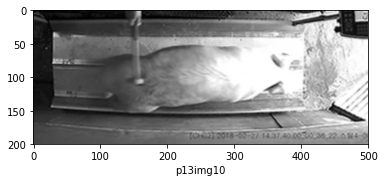

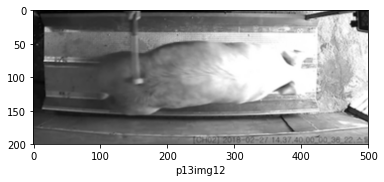

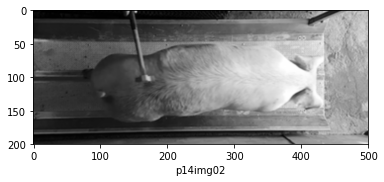

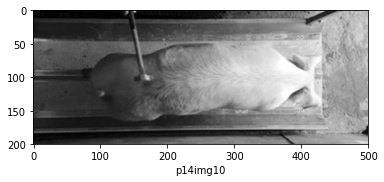

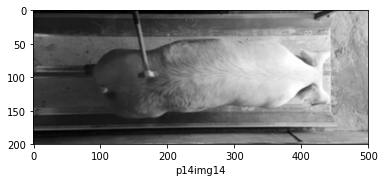

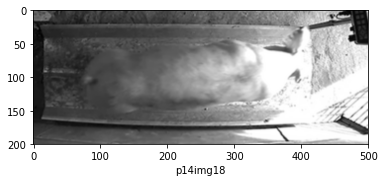

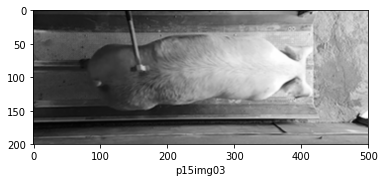

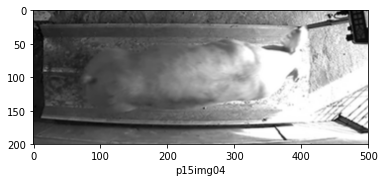

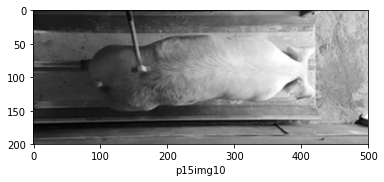

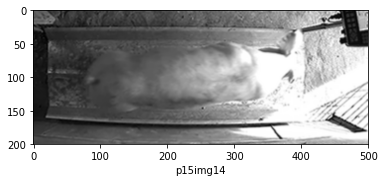

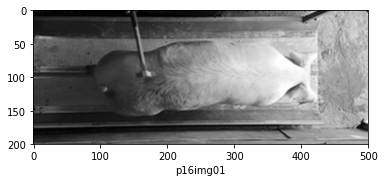

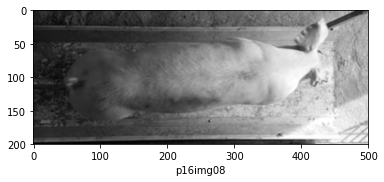

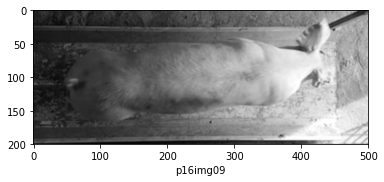

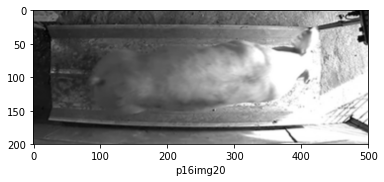

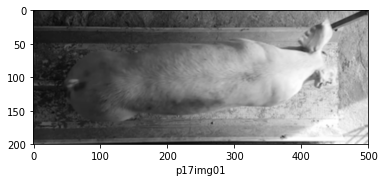

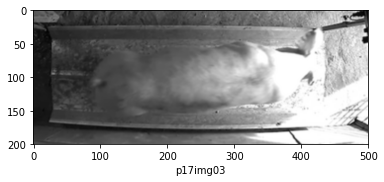

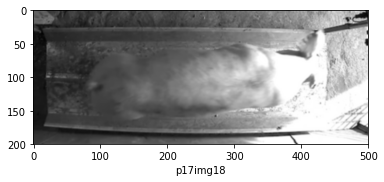

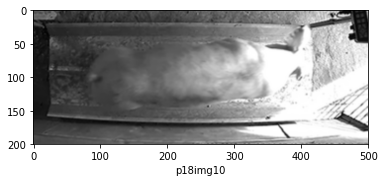

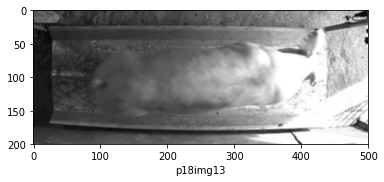

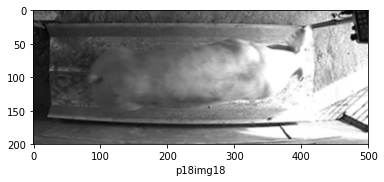

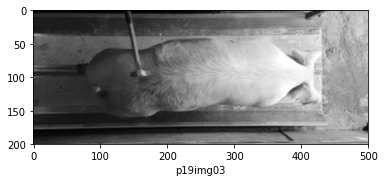

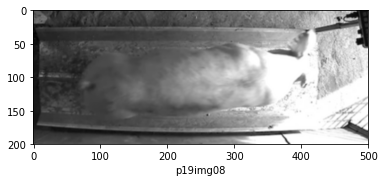

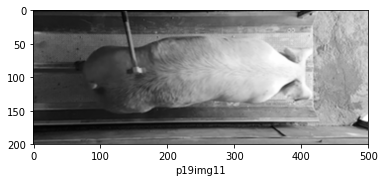

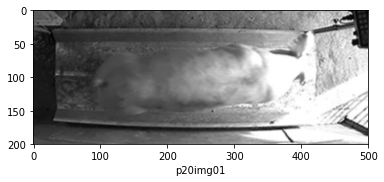

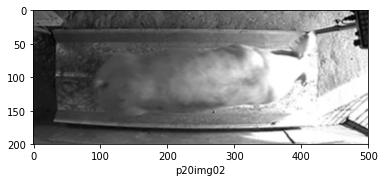

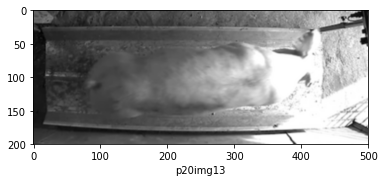

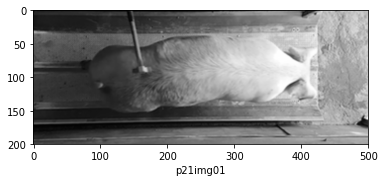

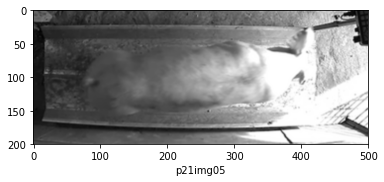

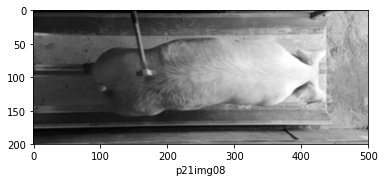

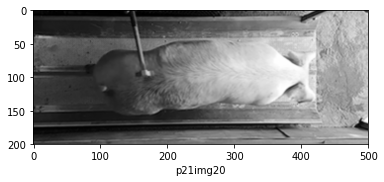

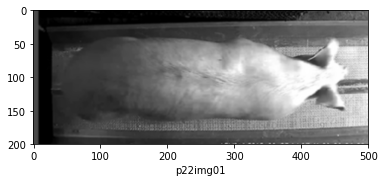

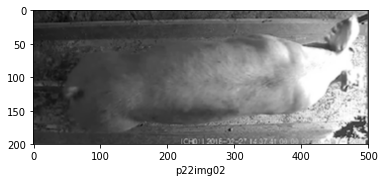

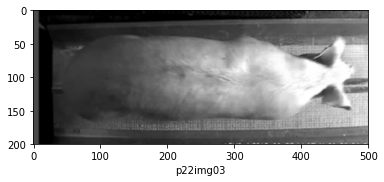

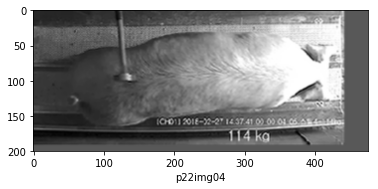

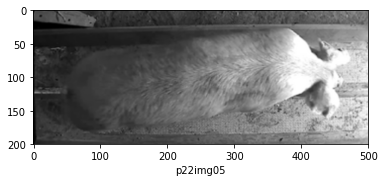

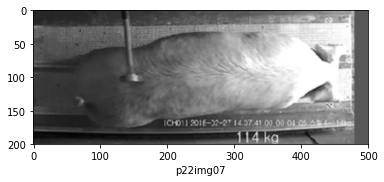

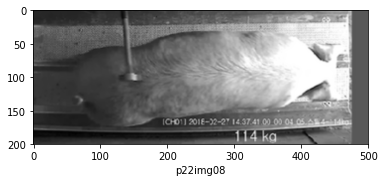

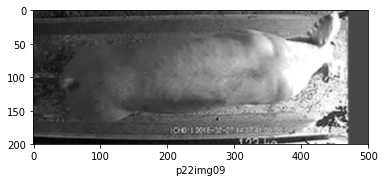

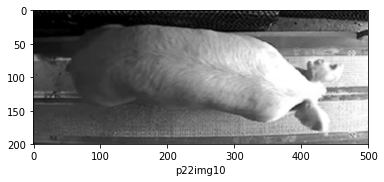

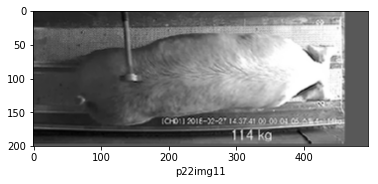

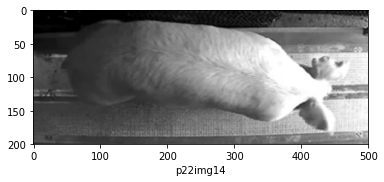

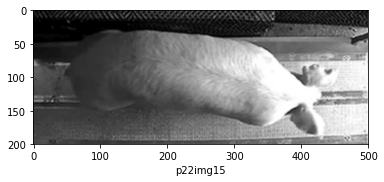

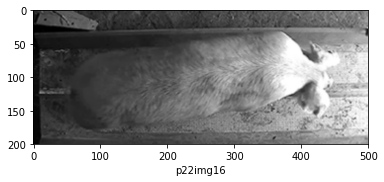

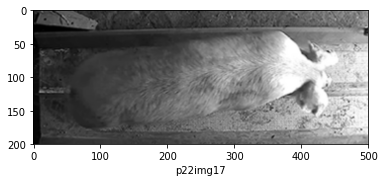

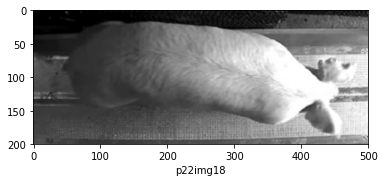

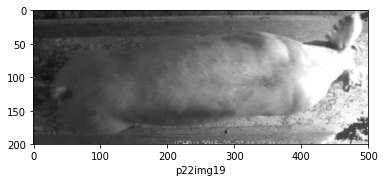

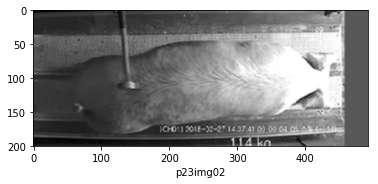

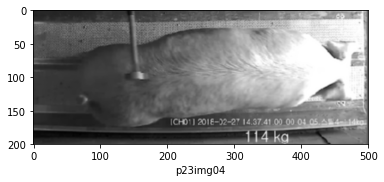

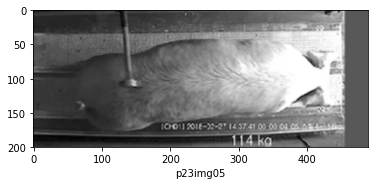

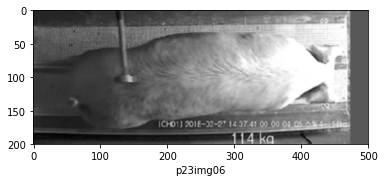

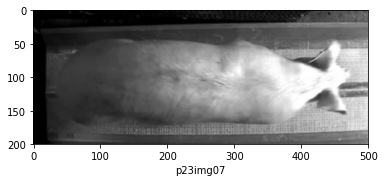

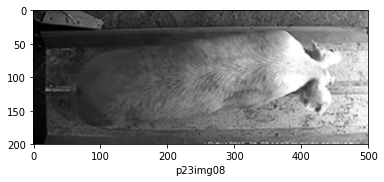

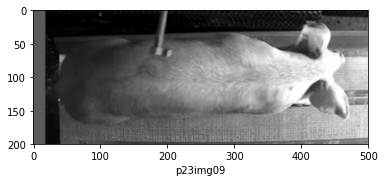

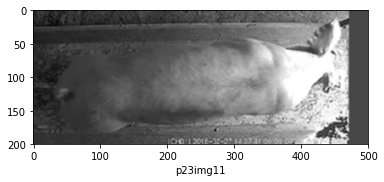

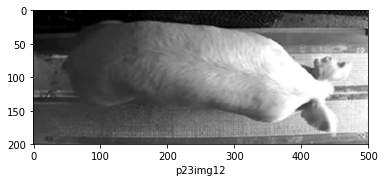

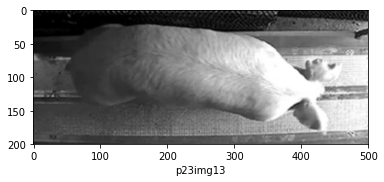

In [313]:
for i in range(len(h_id_hj)):
    plt.imshow(h_img_hj[i], interpolation='bicubic')
    plt.xlabel(h_id_hj[i])
    plt.show()

In [315]:
h_df_hj = pd.DataFrame(data={'pid':h_id_hj, 'images':h_img_hj})
h_df_hj = h_df_hj.set_index('pid')
h_df_hj.tail()

images
pid                                                        
p23img08  [[[2, 2, 2], [12, 12, 12], [29, 29, 29], [15, ...
p23img09  [[[90, 90, 90], [90, 90, 90], [90, 90, 90], [9...
p23img11  [[[47, 47, 47], [48, 48, 48], [44, 44, 44], [4...
p23img12  [[[0, 0, 0], [5, 5, 5], [15, 15, 15], [19, 19,...
p23img13  [[[44, 44, 44], [32, 32, 32], [23, 23, 23], [8...

In [316]:
# make pickle
f = open("./pickle/h_df_hj.bin", "wb")
pickle.dump(h_df_hj, f)
f.close()

# load pickle
f = open("./pickle/h_df_hj.bin", "rb")
h_df_hj = pickle.load(f)
f.close()

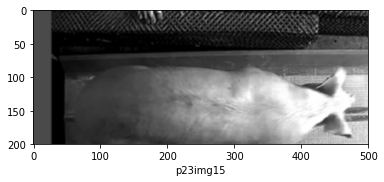

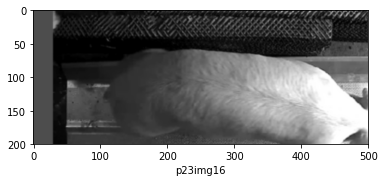

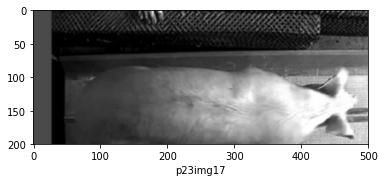

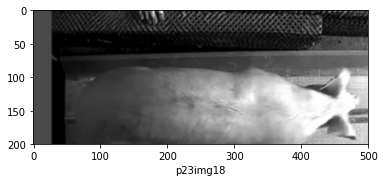

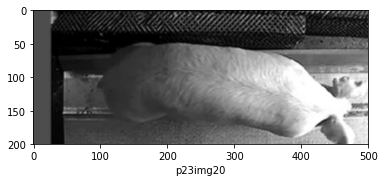

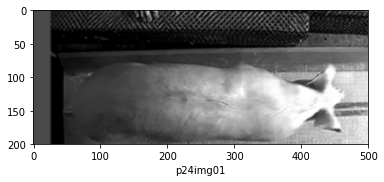

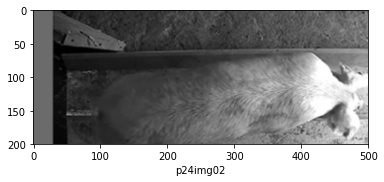

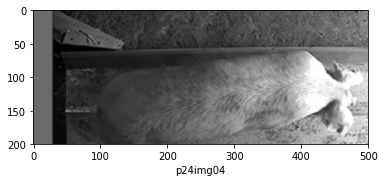

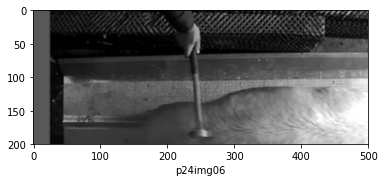

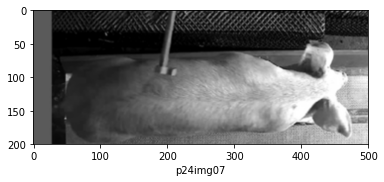

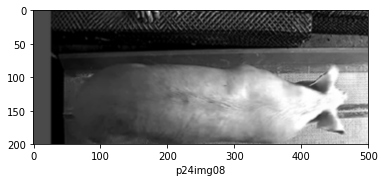

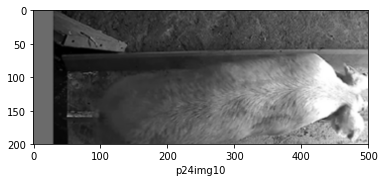

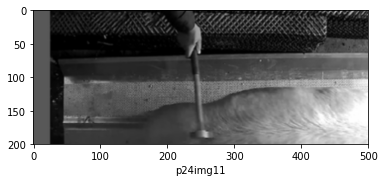

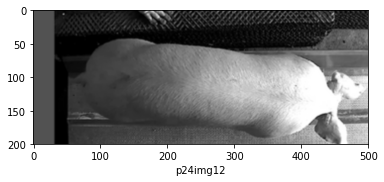

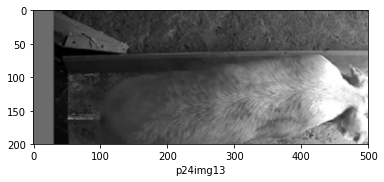

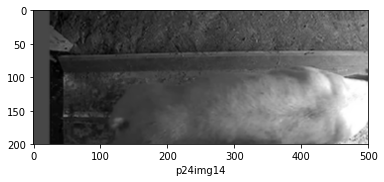

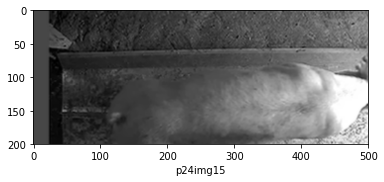

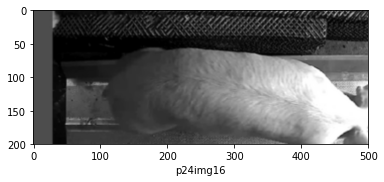

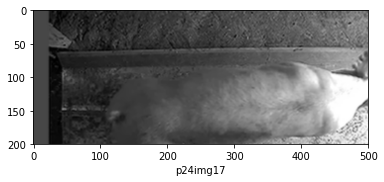

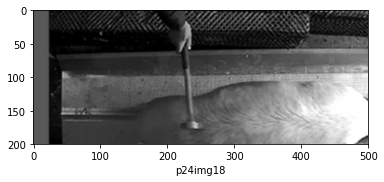

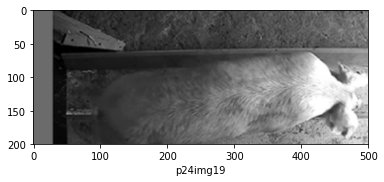

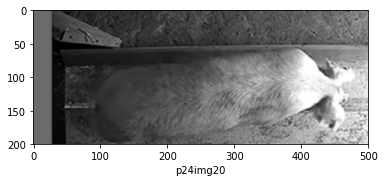

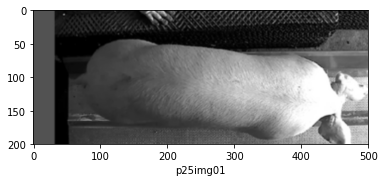

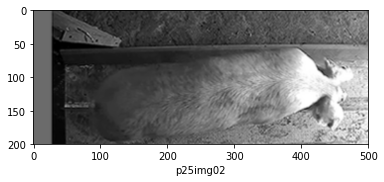

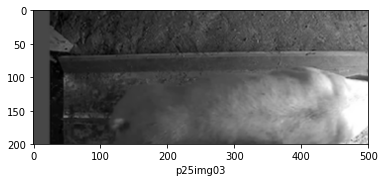

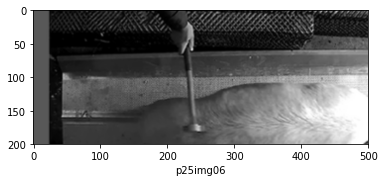

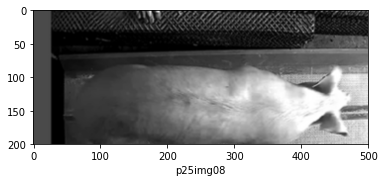

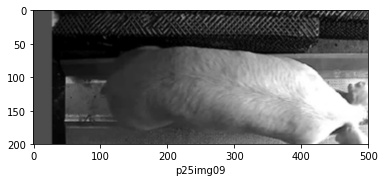

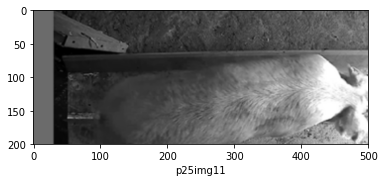

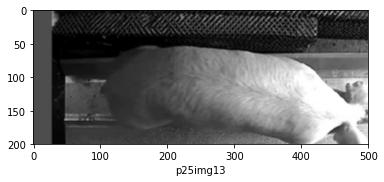

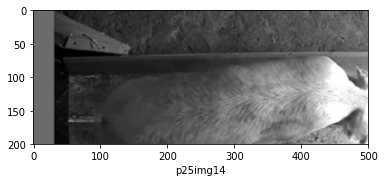

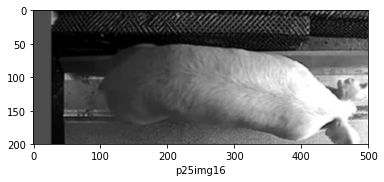

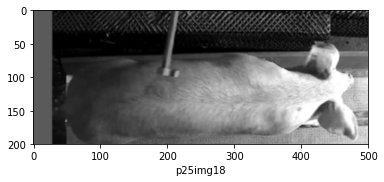

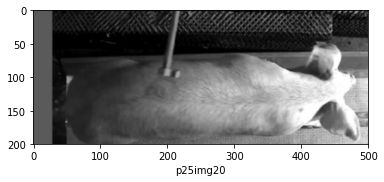

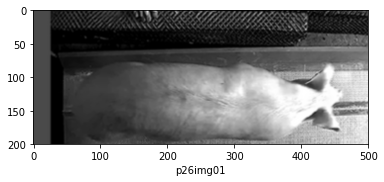

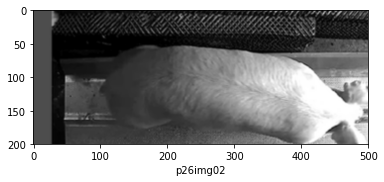

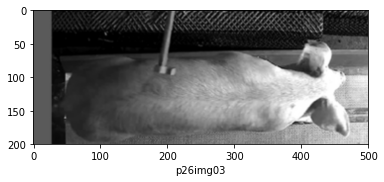

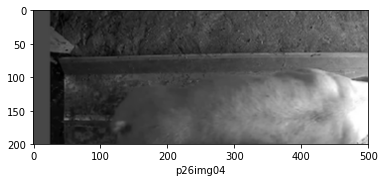

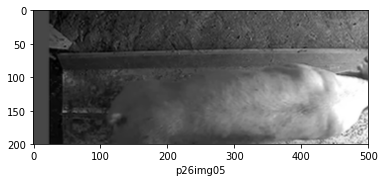

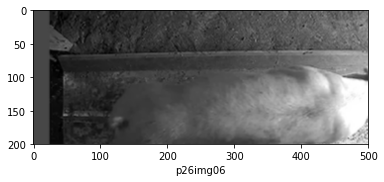

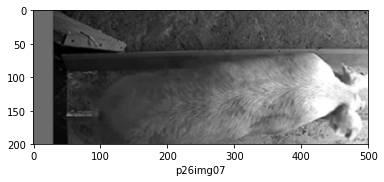

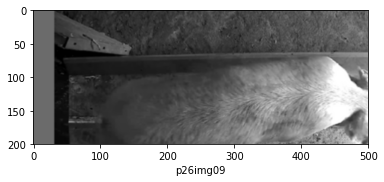

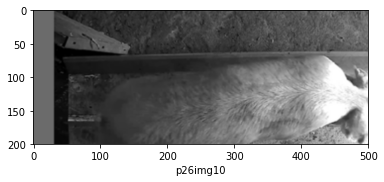

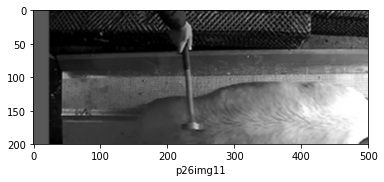

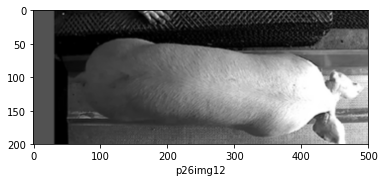

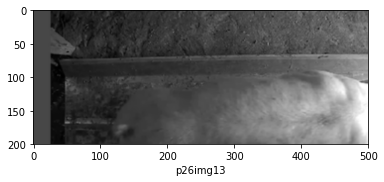

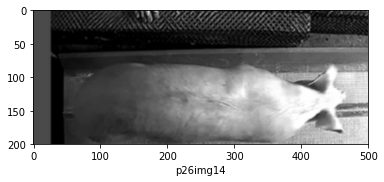

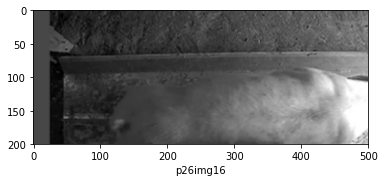

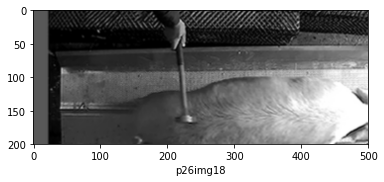

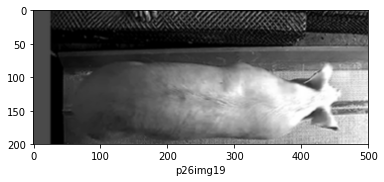

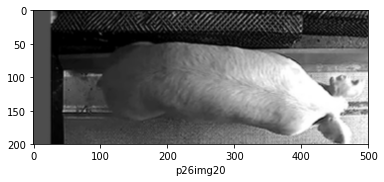

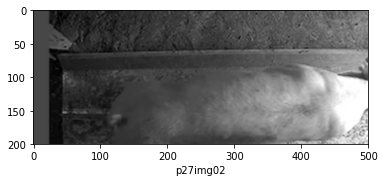

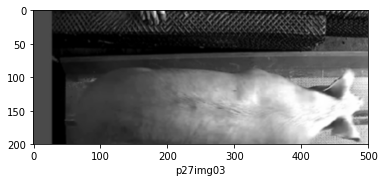

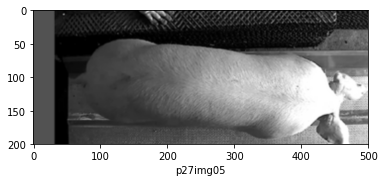

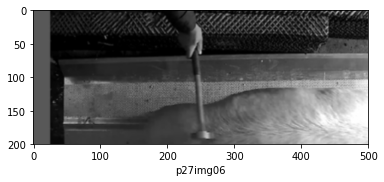

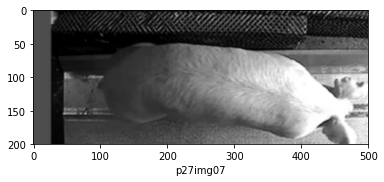

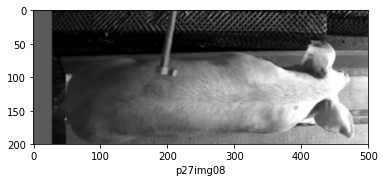

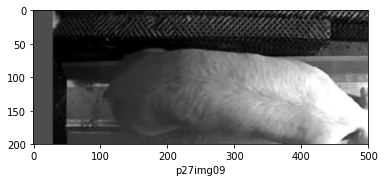

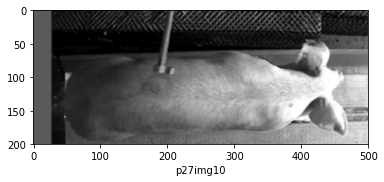

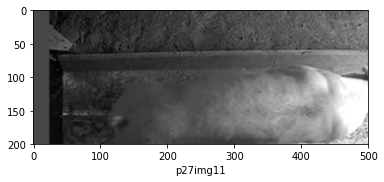

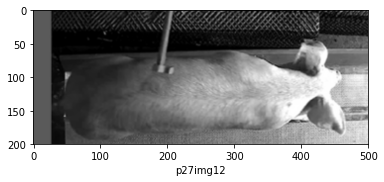

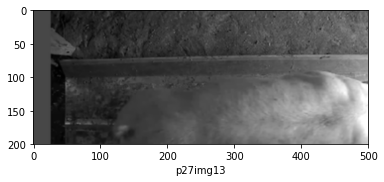

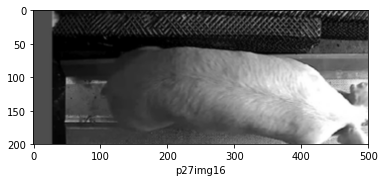

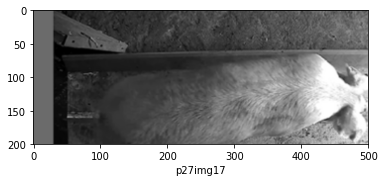

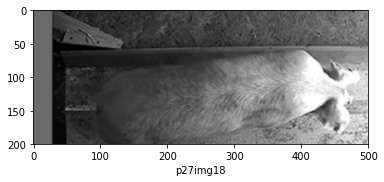

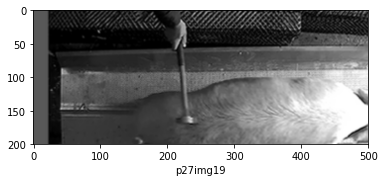

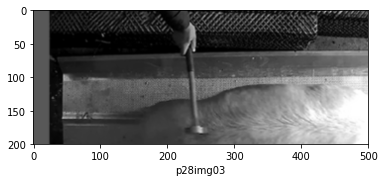

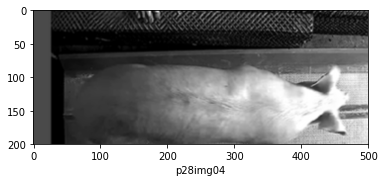

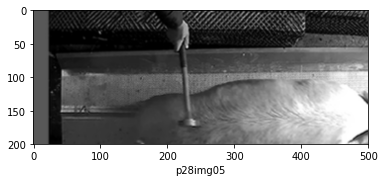

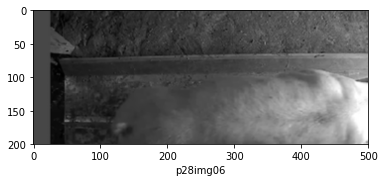

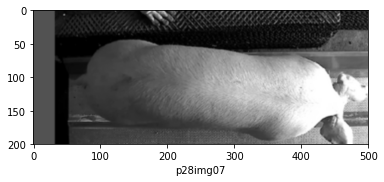

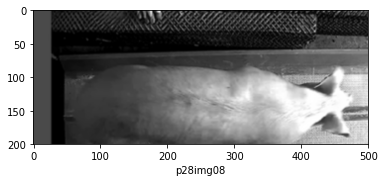

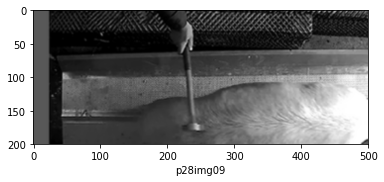

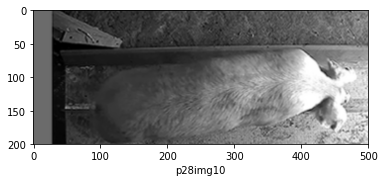

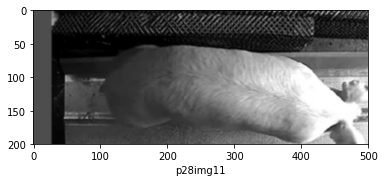

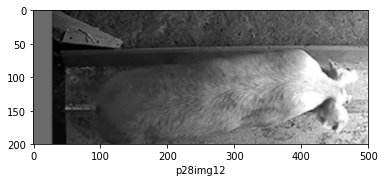

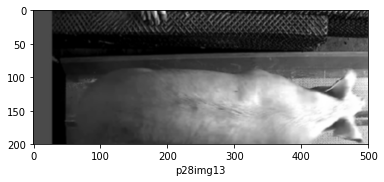

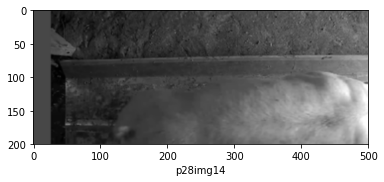

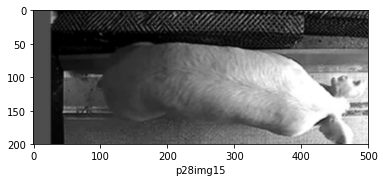

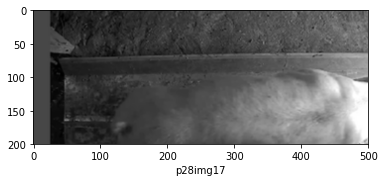

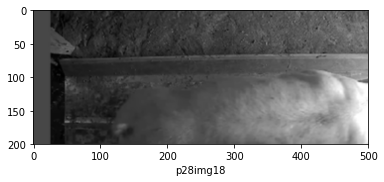

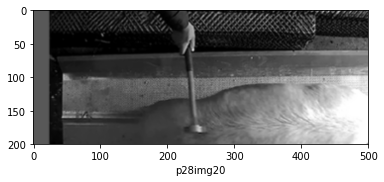

In [321]:
h_id_yj=[]
h_img_yj=[]

for i in range(len(df)):
    if df.pid[i] in yj:
        h_id_yj.append(df.pid[i])
        tmp = df.images[i][50:250, 0:500]
        plt.imshow(tmp, interpolation='bicubic')
#         plt.xlabel(df.pid[i]+ '*' +str(df.weight[i]))
        plt.xlabel(df.pid[i])
        plt.show()

In [324]:
# make pickle

# load pickle
f = open("./pickle/h_img_yj.bin", "rb")
h_img_yj = pickle.load(f)
f.close()

In [325]:
len(h_img_yj), len(h_id_yj)

(82, 82)

In [326]:
h_df_yj = pd.DataFrame(data={'pid':h_id_yj, 'images':h_img_yj})
h_df_yj = h_df_yj.set_index('pid')
h_df_yj.tail()

images
pid                                                        
p28img14  [[[59, 59, 59], [54, 54, 54], [58, 58, 58], [7...
p28img15  [[[74, 74, 74], [74, 74, 74], [74, 74, 74], [7...
p28img17  [[[39, 39, 39], [41, 41, 41], [36, 36, 36], [3...
p28img18  [[[0, 0, 0], [8, 8, 8], [34, 34, 34], [52, 52,...
p28img20  [[[43, 43, 43], [38, 38, 38], [35, 35, 35], [3...

In [327]:
# make pickle
f = open("./pickle/h_df_yj.bin", "wb")
pickle.dump(h_df_yj, f)
f.close()

# # load pickle
# f = open("./pickle/h_df_yj.bin", "rb")
# h_df_yj = pickle.load(f)
# f.close()

In [333]:
crop_df = pd.concat([c_df, h_df_hj, h_df_yj])
crop_df.tail()

images
pid                                                        
p28img14  [[[59, 59, 59], [54, 54, 54], [58, 58, 58], [7...
p28img15  [[[74, 74, 74], [74, 74, 74], [74, 74, 74], [7...
p28img17  [[[39, 39, 39], [41, 41, 41], [36, 36, 36], [3...
p28img18  [[[0, 0, 0], [8, 8, 8], [34, 34, 34], [52, 52,...
p28img20  [[[43, 43, 43], [38, 38, 38], [35, 35, 35], [3...

In [334]:
# make pickle
f = open("./pickle/crop_df.bin", "wb")
pickle.dump(crop_df, f)
f.close()

# # load pickle
# f = open("./pickle/h_df_hj.bin", "rb")
# h_df_hj = pickle.load(f)
# f.close()

In [336]:
len(c_df), len(h_df_hj), len(h_df_yj), len(crop_df), len(df)

(398, 80, 82, 560, 560)

In [337]:
df["images"] = df["pid"].map(crop_df.images)

In [338]:
df.tail()

pid  weight                                             images
555  p28img16  120.89  [[[82, 82, 82], [82, 82, 82], [82, 82, 82], [8...
556  p28img17  120.35  [[[39, 39, 39], [41, 41, 41], [36, 36, 36], [3...
557  p28img18  124.97  [[[0, 0, 0], [8, 8, 8], [34, 34, 34], [52, 52,...
558  p28img19  124.12  [[[90, 90, 90], [90, 90, 90], [90, 90, 90], [9...
559  p28img20  124.64  [[[43, 43, 43], [38, 38, 38], [35, 35, 35], [3...

In [339]:
# # make pickle
# f = open("./pickle/df0.bin", "wb")
# pickle.dump(df, f)
# f.close()

# # load pickle
# f = open("./pickle/df0.bin", "rb")
# df0 = pickle.load(f)
# f.close()

In [ ]:
# resize4

In [64]:
df["images"] = df["pid"].map(c_df.images)
df.tail()

pid  weight                                             images
555  p28img16  121.22  [[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, ...
556  p28img17  124.70                                                NaN
557  p28img18  120.82                                                NaN
558  p28img19  121.72  [[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, ...
559  p28img20  124.12                                                NaN

In [67]:
df = df.dropna()

In [68]:
df.tail()

pid  weight                                             images
539  p27img20  122.28  [[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, ...
540  p28img01  125.27  [[107, 107, 107, 107, 107, 107, 107, 107, 107,...
541  p28img02  127.06  [[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, ...
555  p28img16  121.22  [[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, ...
558  p28img19  121.72  [[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, ...

In [70]:
df.reset_index(inplace=True, drop=True)
df.tail()

pid  weight                                             images
393  p27img20  122.28  [[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, ...
394  p28img01  125.27  [[107, 107, 107, 107, 107, 107, 107, 107, 107,...
395  p28img02  127.06  [[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, ...
396  p28img16  121.22  [[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, ...
397  p28img19  121.72  [[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, ...

In [71]:
# make pickle
f = open("./pickle/re4_df.bin", "wb")
pickle.dump(df, f)
f.close()

# # load pickle
# f = open("./pickle/re4_df.bin", "rb")
# df2 = pickle.load(f)
# f.close()